In [14]:
import numpy as np

bspline3 = np.array([
    [-1, 3, -3, 1],
    [3, -6, 3, 0],
    [-3, 0, 3, 0],
    [1, 4, 1, 0]]) / 6

bezier3 = np.array([
    [-1, 3, -3, 1],
    [3, -6, 3, 0], 
    [-3, 3, 0, 0],
    [1, 0, 0, 0]])

jerk_matrix = np.array([[6,0,0,0]])

points = np.array([[0,0],[1,0],[1,1],[0,1]])
jerk = jerk_matrix@bspline3@points
effort = np.linalg.norm(jerk)**2
effort

4.0

In [15]:
from scipy.optimize import minimize

def calculate_effort(points):
    jerk_matrix = np.array([[6,0,0,0]])
    jerk = jerk_matrix@bezier3@points
    return np.linalg.norm(jerk)**2



# Objective function: sum of squares of the equations
def objective(control_points):
    points = np.array(control_points).reshape((4,-1))
    effort = calculate_effort(points)
    # Your equations here, corrected to return the sum of squares
    return effort
# Bounds for mu, sigma, and tf
bounds = ((3, 8), (5, 7), (0, 10), (0, 10),(0, 10), (0, 10),(0, 10), (0, 10))

# Initial guess
# initial_guess = [1, 0, 1]
initial_guess = [0,0,0,1,1,1,1,0] #x1y1x2y2x3y3x4y4
# Minimization with SLSQP
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds)
print(result)
# Check the result
if result.success:
    print(f"Found solution: result.x = {result.x}")
else:
    print("Failed to find a solution:", result.message)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.070731539050861e-10
       x: [ 3.011e+00  5.000e+00  1.214e+00  2.125e+00  9.101e-01
            8.749e-01  2.098e+00  1.250e+00]
     nit: 4
     jac: [-1.254e-04 -1.177e-04  3.825e-04  3.594e-04 -3.729e-04
           -3.497e-04  1.264e-04  1.187e-04]
    nfev: 40
    njev: 4
Found solution: result.x = [3.01112757 5.         1.21443353 2.12494047 0.9101215  0.87488581
 2.09819325 1.24983767]


[[3.01112757 5.        ]
 [1.21443353 2.12494047]
 [0.9101215  0.87488581]
 [2.09819325 1.24983767]]


2.070731539050861e-10

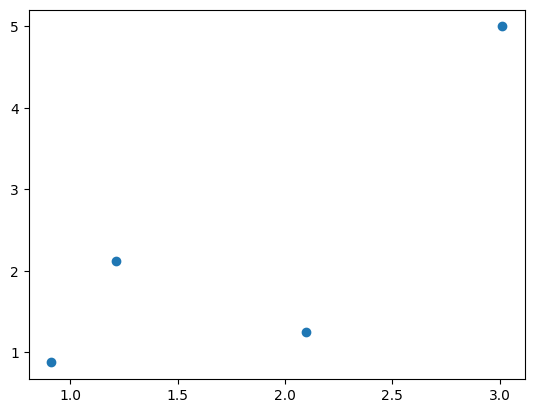

In [16]:
points = result.x.reshape(4,-1)
print(points)
import matplotlib.pyplot as plt
#plot the points which are currently of shape (4,2)
plt.scatter(points[:,0], points[:,1])
calculate_effort(points)

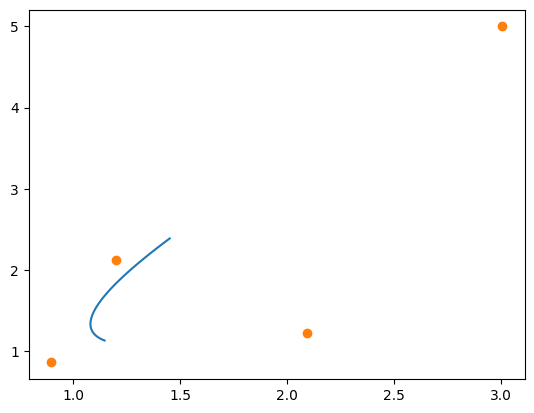

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.563224459373203e-06
            Iterations: 44
            Function evaluations: 630
            Gradient evaluations: 44
[[0.1552307  0.19086944 0.22632161]
 [0.26176967 0.2970627  0.33229861]
 [0.3674441  0.40246757 0.43746468]
 [0.4722927  0.50712136 0.54177249]]


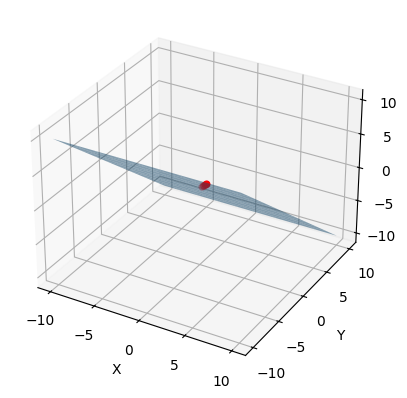

In [13]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function to minimize jerk
def objective(control_points):
    # Assuming control_points is a 2D array with shape (4, 3) representing 4 control points in 3D space
    # Calculate the second derivative of the control points to get acceleration
    acceleration = np.gradient(np.gradient(control_points, axis=0), axis=0)
    # Calculate the rate of change of acceleration (jerk)
    jerk = np.gradient(acceleration, axis=0)
    # Sum the squares of the jerk components to minimize overall jerk
    jerk_magnitude = np.linalg.norm(jerk)
    return jerk_magnitude

#define plane characteristics n and d
n = np.array([0, 1, 1])
d = 0
# Define the constraint function to enforce points lying on one side of the plane
def plane_constraint(control_points):
    # Assuming control_points is a 2D array with shape (4, 3) representing 4 control points in 3D space
    # Calculate the dot product of each control point with the normal vector and add the distance
    distances_to_plane = np.dot(control_points.reshape(-1,3), n) + d
    # Return a 1D array with the constraint equation for each control point
    return distances_to_plane

# Define initial guess for control point positions
x1, y1, z1 = 0, 0, 0
x2, y2, z2 = 1, 0, 0
x3, y3, z3 = 1, 1, 0
x4, y4, z4 = 0, 1, 0
# Define initial guess for control point positions as a flattened 1D array
initial_guess = np.array([x1, y1, z1, x2, y2, z2, x3, y3, z3, x4, y4, z4])

# Define the constraint dictionary for scipy.optimize.minimize
constraints = [{'type': 'ineq', 'fun': plane_constraint}]
# Define the options dictionary for scipy.optimize.minimize
options = {'disp': True}  # Display optimization progress

# Use scipy.optimize.minimize to find the optimal positions of the control points
result = minimize(objective, initial_guess, constraints=constraints, options=options)


# Optimal positions of the control points
optimal_control_points = result.x.reshape((4, 3))
print(optimal_control_points)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the separating plane
xx, yy = np.meshgrid(np.linspace(-10, 10, 10), np.linspace(-10, 10, 10))
z = (-n[0] * xx - n[1] * yy - d) * 1. /n[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, alpha=0.5)

# Plot the control points
control_points = result.x.reshape((4, 3))
ax.scatter(control_points[:, 0], control_points[:, 1], control_points[:, 2], c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
